8.579579046319909e-07


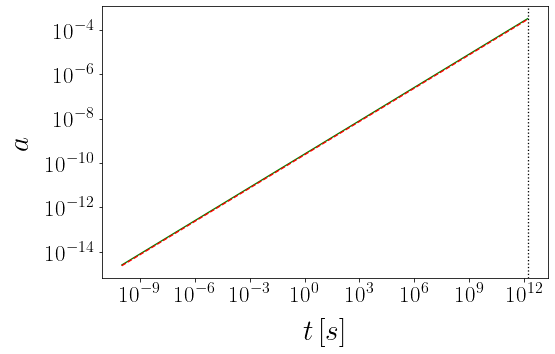

In [3]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import math
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
from accretion import *
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})
 
    
    
def a_1(t):
    print(np.sqrt(3) * (((4 * np.pi * G * ρ_eq)/3)**(1/4)))
    return np.sqrt(3) * (((4 * np.pi * G * ρ_eq)/3)**(1/4)) * a_eq * np.sqrt(t)



def a_2(t):
    return  a_eq * np.sqrt(t/t_eq)


def a_3(t):
    C = (((3 * t)/2) * (((4 * np.pi * G * ρ_eq)/3)**(1/2))  - 2)**2
    x = (((np.sqrt((C**2)- 4*C) + C - 2)/2)**(1/3))
    return a_eq * (x + (1/x) + 1)

t = np.geomspace(1e-10, t_eq, 1000000)


fig, ax = plt.subplots(1, figsize = (8, 5))
plt.rc('lines', linewidth = 1.3)

plt.loglog(t, a_1(t), 'g')
plt.loglog(t, a_2(t), 'r--')
#plt.loglog(t, a_3(t), 'r')
plt.axvline(x = t_eq,  color = 'k',  linestyle = ':')

plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$t\,[s]$',fontsize = 29.5, labelpad = 12)
plt.ylabel('$a$',fontsize = 29.5, labelpad = 12)


#plt.title(r'Radiation accretion up to $t_\mathrm{eq}$, $\eta_{acc} = 0.1$', fontsize = 24, pad = 8)
#plt.savefig('racc.pdf', bbox_inches = 'tight')
plt.show()

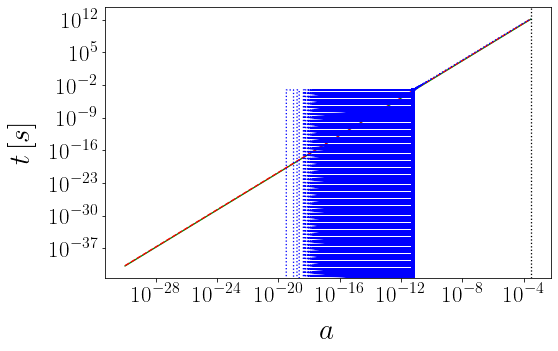

In [13]:
def t_1(a):
    return (1/3) * ((3/(4 * np.pi * G * ρ_eq))**(1/2)) * ((a/a_eq)**2)



def t_2(a):
    return  t_eq * ((a/a_eq)**2)


def t_3(a):
    C =  np.sqrt(3/(4 * np.pi * G * ρ_eq))
    s = a/a_eq
    return C * ((2/3) * (s-2) * np.sqrt(s+1) + (4/3))

a = np.geomspace(1e-30, a_eq, 1000000)


fig, ax = plt.subplots(1, figsize = (8, 5))
plt.rc('lines', linewidth = 1.3)

plt.loglog(a, t_1(a), 'g')
plt.loglog(a, t_2(a), 'r--')
plt.loglog(a, t_3(a), 'b:')
plt.axvline(x = a_eq,  color = 'k',  linestyle = ':')

plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.ylabel('$t\,[s]$',fontsize = 29.5, labelpad = 12)
plt.xlabel('$a$',fontsize = 29.5, labelpad = 12)


#plt.title(r'Radiation accretion up to $t_\mathrm{eq}$, $\eta_{acc} = 0.1$', fontsize = 24, pad = 8)
#plt.savefig('racc.pdf', bbox_inches = 'tight')
plt.show()

In [29]:
from sympy import *
β = ((3/(4 * np.pi * G * ρ_eq))**(1/2))
t, β, a_eq, a = symbols("t β a_eq a ")
eq = t - β * ((2/3) * ((a/a_eq)-2) * (((a/a_eq)+1)**(1/2)) + (4/3))
solve(eq, a)

[-1.0*a_eq**2/(-a_eq**3 + (-a_eq**6 + (-a_eq**3 + 0.125*(-9.0*a_eq**3*t**2 + 24.0*a_eq**3*t*β)/β**2)**2)**0.5 + 0.125*(-9.0*a_eq**3*t**2 + 24.0*a_eq**3*t*β)/β**2)**(1/3) + a_eq - 1.0*(-a_eq**3 + (-a_eq**6 + (-a_eq**3 + 0.125*(-9.0*a_eq**3*t**2 + 24.0*a_eq**3*t*β)/β**2)**2)**0.5 + 0.125*(-9.0*a_eq**3*t**2 + 24.0*a_eq**3*t*β)/β**2)**(1/3),
 -1.0*a_eq**2*(-0.5 - 0.866025403784439*I)/(-a_eq**3 + (-a_eq**6 + (-a_eq**3 + 0.125*(-9.0*a_eq**3*t**2 + 24.0*a_eq**3*t*β)/β**2)**2)**0.5 + 0.125*(-9.0*a_eq**3*t**2 + 24.0*a_eq**3*t*β)/β**2)**(1/3) + a_eq - 1.0*(-0.5 + 0.866025403784439*I)*(-a_eq**3 + (-a_eq**6 + (-a_eq**3 + 0.125*(-9.0*a_eq**3*t**2 + 24.0*a_eq**3*t*β)/β**2)**2)**0.5 + 0.125*(-9.0*a_eq**3*t**2 + 24.0*a_eq**3*t*β)/β**2)**(1/3),
 -1.0*a_eq**2*(-0.5 + 0.866025403784439*I)/(-a_eq**3 + (-a_eq**6 + (-a_eq**3 + 0.125*(-9.0*a_eq**3*t**2 + 24.0*a_eq**3*t*β)/β**2)**2)**0.5 + 0.125*(-9.0*a_eq**3*t**2 + 24.0*a_eq**3*t*β)/β**2)**(1/3) + a_eq - 1.0*(-0.5 - 0.866025403784439*I)*(-a_eq**3 + (-a_eq**6